<a href="https://colab.research.google.com/github/BabyFace-Creation/PCVK-Genap-20-21/blob/main/Jobsheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import argparse
import glob

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

In [5]:
def dithering_gray(inMat, samplingF):
    #https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
    h = inMat.shape[0]
    w = inMat.shape[1]
    
    # loop over the image
    for y in range(0, h-1):
        for x in range(1, w-1):
            # threshold the pixel
            old_p = inMat[y, x]
            new_p = np.round(samplingF * old_p/255.0) * (255/samplingF)
            inMat[y, x] = new_p
            
            quant_error_p = old_p - new_p
            


            # inMat[y, x+1] = minmax(inMat[y, x+1] + quant_error_p * 7 / 16.0)
            # inMat[y+1, x-1] = minmax(inMat[y+1, x-1] + quant_error_p * 3 / 16.0)
            # inMat[y+1, x] = minmax(inMat[y+1, x] + quant_error_p * 5 / 16.0)
            # inMat[y+1, x+1] = minmax(inMat[y+1, x+1] + quant_error_p * 1 / 16.0)
            
            inMat[y, x+1] = minmax(inMat[y, x+1] + quant_error_p * 7 / 16.0)
            inMat[y+1, x-1] = minmax(inMat[y+1, x-1] + quant_error_p * 3 / 16.0)
            inMat[y+1, x] = minmax(inMat[y+1, x] + quant_error_p * 5 / 16.0)
            inMat[y+1, x+1] = minmax(inMat[y+1, x+1] + quant_error_p * 1 / 16.0)


            #   quant_error  := oldpixel - newpixel
            #   pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
            #   pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
            #   pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
            #   pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16


    # return the thresholded image
    return inMat

In [6]:
def dithering_color(inMat, samplingF):
    #https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
    h = inMat.shape[0]
    w = inMat.shape[1]
     
    # loop over the image
    for y in range(0, h-1):
        for x in range(1, w-1):
            # threshold the pixel
            old_b = inMat[y, x, 0]
            old_g = inMat[y, x, 1]
            old_r = inMat[y, x, 2]
            
            new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
            new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
            new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)


            inMat[y, x, 0] = new_b
            inMat[y, x, 1] = new_g
            inMat[y, x, 2] = new_r




            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r


            inMat[y, x+1, 0] = minmax(inMat[y, x+1, 0] + quant_error_b * 7 / 16.0)
            inMat[y, x+1, 1] = minmax(inMat[y, x+1, 1] + quant_error_g * 7 / 16.0)
            inMat[y, x+1, 2] = minmax(inMat[y, x+1, 2] + quant_error_r * 7 / 16.0)
            
            inMat[y+1, x-1, 0] = minmax(inMat[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            inMat[y+1, x-1, 1] = minmax(inMat[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            inMat[y+1, x-1, 2] = minmax(inMat[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            inMat[y+1, x, 0] = minmax(inMat[y+1, x, 0] + quant_error_b * 5 / 16.0)
            inMat[y+1, x, 1] = minmax(inMat[y+1, x, 1] + quant_error_g * 5 / 16.0)
            inMat[y+1, x, 2] = minmax(inMat[y+1, x, 2] + quant_error_r * 5 / 16.0)


            inMat[y+1, x+1, 0] = minmax(inMat[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            inMat[y+1, x+1, 1] = minmax(inMat[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            inMat[y+1, x+1, 2] = minmax(inMat[y+1, x+1, 2] + quant_error_r * 1 / 16.0)


            #   quant_error  := oldpixel - newpixel
            #   pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
            #   pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
            #   pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
            #   pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16


    # return the thresholded image
    return inMat


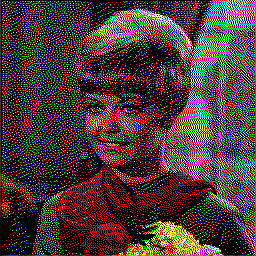

In [16]:

inMat = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
#color ditering
outMat_color = dithering_color(inMat.copy(), 1)
cv2_imshow(outMat_color)


#gray ditering
grayMat = cv.cvtColor(inMat, cv.COLOR_BGR2GRAY)
outMat_gray = dithering_gray(grayMat.copy(), 1)



2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


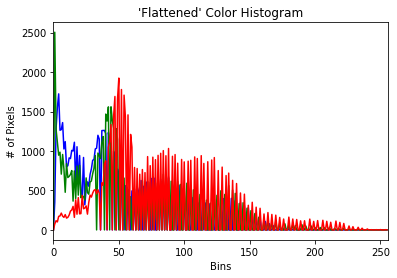

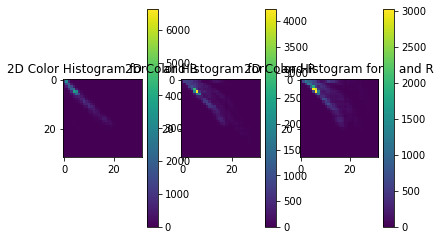

In [20]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

chans = cv.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])
 
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

hist = cv.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))


# show our plots
plt.show()

In [34]:
def run_histogram_equalization(img):
    rgb_img = img

    # convert from RGB color-space to YCrCb
    ycrcb_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2YCrCb)

    # equalize the histogram of the Y channel
    ycrcb_img[:, :, 0] = cv.equalizeHist(ycrcb_img[:, :, 0])

    # convert back to RGB color-space from YCrCb
    equalized_img = cv.cvtColor(ycrcb_img, cv.COLOR_YCrCb2BGR)

    return equalized_img

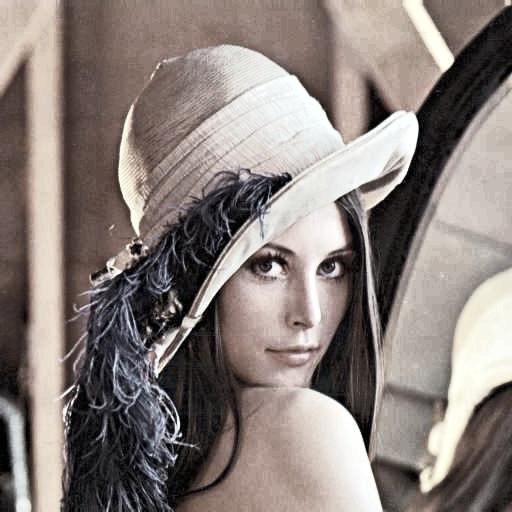

In [45]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

show = run_histogram_equalization(image)
cv2_imshow(show)

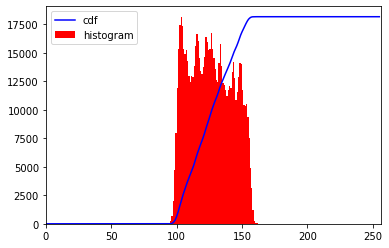

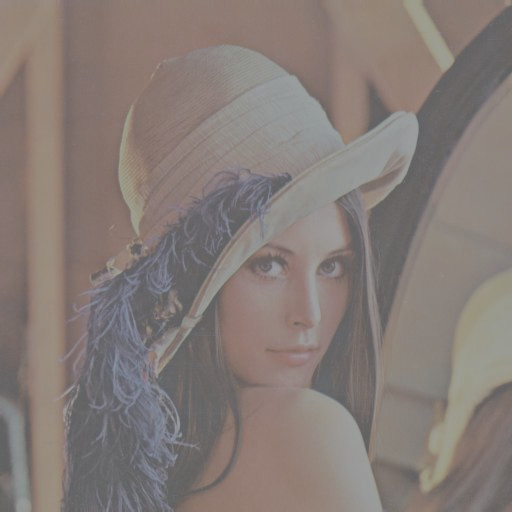

In [46]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/lena_lc.jpg')

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
cv2_imshow(img)

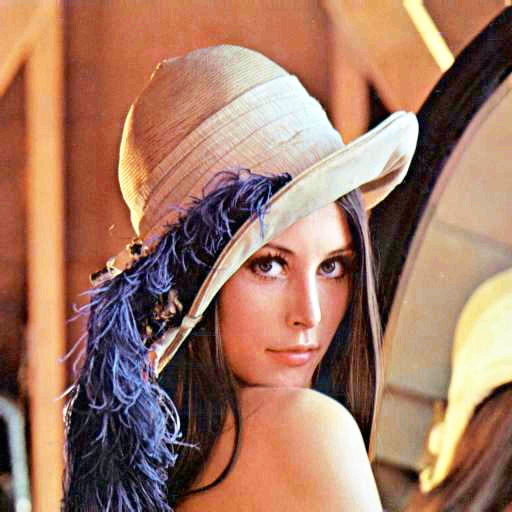

In [47]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
cv2_imshow(img2)